## Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

## Read & Clean Data

In [17]:
def read_and_clean_movie_data(filepath):
    """
    Read and clean movie data from a CSV file.
    
    Returns:
    pandas.DataFrame: Cleaned movie dataset
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
   
    # Clean up the Gross column by removing commas and converting to numeric
    df['Gross'] = df['Gross'].str.replace(',', '').str.replace('"', '').astype(float)
    
    # Clean up Runtime column
    df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
    
    # Handle missing or infinite values
    numeric_columns = ['IMDB_Rating', 'Runtime', 'Gross']
    
    # Replace infinite values with NaN
    df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)
    
    # Replace missing values with median
    imputer = SimpleImputer(strategy='median')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    
    return df

## Load & Display Data

In [18]:
movies_df = read_and_clean_movie_data('imdb_top_1000.csv')
movies_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


## Descriptive Statistics [Mean, Standard Deviation, Skewness & Kurtosis]

## Plot-1: Statistical Graph [Correlation Matrix HeatMap]

Descriptive Statistics:
       IMDB_Rating      Runtime         Gross
count  1000.000000  1000.000000  1.000000e+03
mean      7.949300   122.891000  6.051360e+07
std       0.275491    28.093671  1.014192e+08
min       7.600000    45.000000  1.305000e+03
25%       7.700000   103.000000  5.012919e+06
50%       7.900000   119.000000  2.353089e+07
75%       8.100000   137.000000  6.153989e+07
max       9.300000   321.000000  9.366622e+08


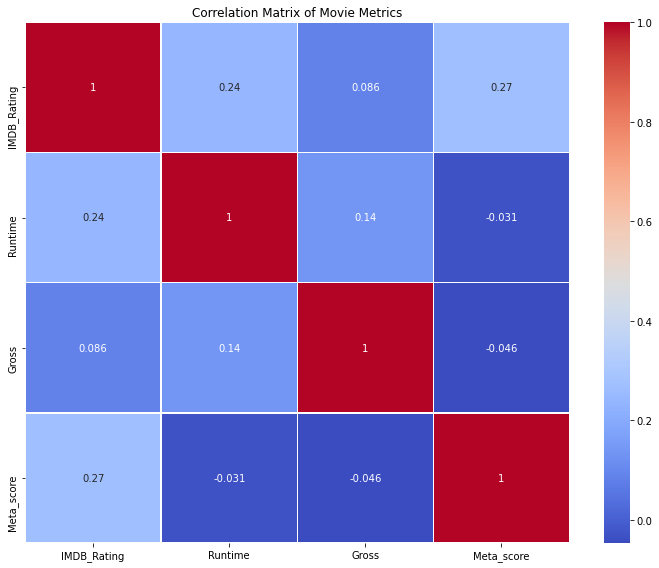


Skewness and Kurtosis of Numerical Columns:
IMDB_Rating: Skewness = 1.0170, Kurtosis = 1.4327
Runtime: Skewness = 1.2079, Kurtosis = 3.4263
Gross: Skewness = 3.5032, Kurtosis = 17.2675


In [19]:
def descriptive_statistics(df):
    """
    Perform and print descriptive statistics.
    Display correlation matrix heatmap
    """
    print("Descriptive Statistics:")
    print(df[['IMDB_Rating', 'Runtime', 'Gross']].describe())
    
    # Correlation Matrix
    correlation_matrix = df[['IMDB_Rating', 'Runtime', 'Gross', 'Meta_score']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Movie Metrics')
    plt.tight_layout()
    plt.show()
descriptive_statistics(movies_df)

def calculate_skewness_and_kurtosis(df):
    """
    Calculate and print the skewness and kurtosis for relevant numerical columns.
    
    """
    print("\nSkewness and Kurtosis of Numerical Columns:")
    for col in ['IMDB_Rating', 'Runtime', 'Gross']:
        skew = df[col].skew()
        kurt = df[col].kurt()
        print(f"{col}: Skewness = {skew:.4f}, Kurtosis = {kurt:.4f}")
calculate_skewness_and_kurtosis(movies_df)

## Plot-2: Relational Graph (Scatter Plot)

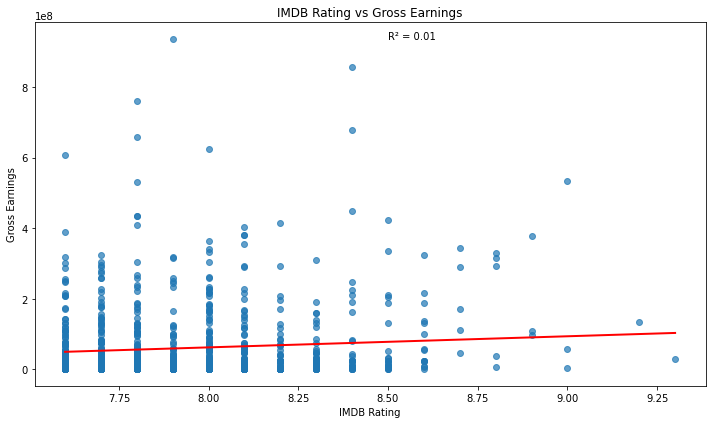

In [20]:
def plot_rating_vs_gross(df):
    """
    Create a scatter plot of IMDB Rating vs Gross with linear regression.
    
    Parameters:
    df : Movie dataset
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['IMDB_Rating'], df['Gross'], alpha=0.7)
    plt.title('IMDB Rating vs Gross Earnings')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Gross Earnings')
    
    # Prepare data for linear regression
    X = df['IMDB_Rating'].values.reshape(-1, 1)
    y = df['Gross'].values
    
    # Perform linear regression
    reg = LinearRegression().fit(X, y)
    plt.plot(X, reg.predict(X), color='red', linewidth=2)
    plt.text(8.5, df['Gross'].max(), f'R² = {reg.score(X, y):.2f}', fontsize=10)
    
    plt.tight_layout()
    plt.show()
plot_rating_vs_gross(movies_df)

## Plot-3: Categorical Graph (Bar Chart)

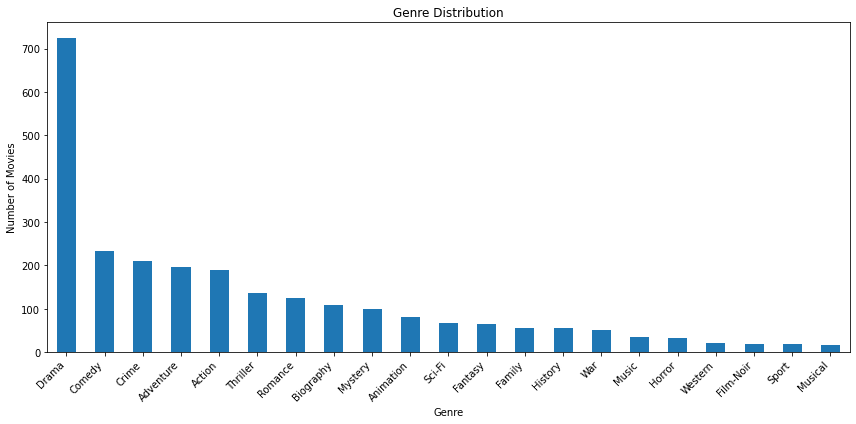

In [21]:
def plot_genre_distribution(df):
    """
    Create a bar plot of genre distribution.
    
    Parameters:
    df : Movie dataset
    """
    # Explode the Genre column
    df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
    
    # Count genres
    genre_counts = df_exploded['Genre'].value_counts()
    
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar')
    plt.title('Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_genre_distribution(movies_df)

## Plot-4: KMeans Clustering & Silhouette plot

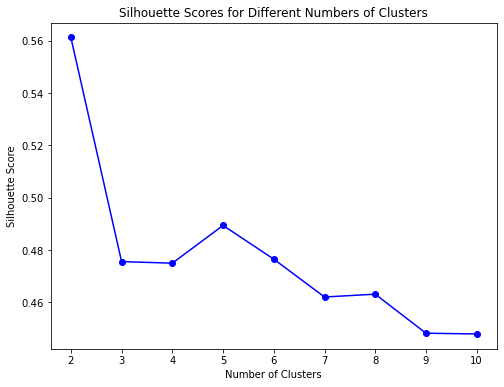

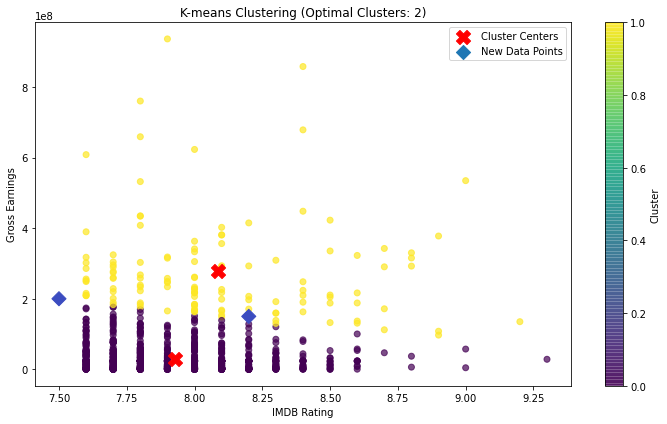

Optimal number of clusters: 2
Silhouette Score: 0.5613
Cluster Centers (Backscaled):
[[7.92968037e+00 2.97538917e+07]
 [8.08790323e+00 2.77816045e+08]]
New Data Cluster Labels: [1 1]


In [22]:
def perform_kmeans_clustering_with_predictions_and_plot(df, new_data):
    """
    Perform K-means clustering on movie data, predict new data points' clusters, 
    backscale the results to the original scale, and plot the clustering result with cluster centers.

    Parameters:
    df : Movie dataset
    new_data (array-like): New data points to predict cluster labels for
                           (should be an array-like with the same structure as 'df')
    """
    # Select features for clustering
    features = ['IMDB_Rating', 'Gross']
    
    # Normalize the features using StandardScaler
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(df[features])
    
    # Elbow Method to determine the optimal number of clusters
    inertias = []
    for k in range(1, 11):  # Trying 1 to 10 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        inertias.append(kmeans.inertia_)
    
    # Calculate silhouette scores for 2 to 10 clusters
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(features_scaled)
        silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))
        
    # Plot silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Determine optimal number of clusters based on silhouette score
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    
    # Final clustering using the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)
    
    # Predict cluster labels for new data points
    new_data_scaled = scaler.transform(new_data)  # Scaling the new data using the same scaler
    new_clusters = kmeans.predict(new_data_scaled)
    
    # Backscale the cluster centers to original scale
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Plotting the clusters and their centers
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['IMDB_Rating'], df['Gross'], c=clusters, cmap='viridis', alpha=0.7)
    
    # Plot cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    
    # Plot new data points and their predicted clusters
    plt.scatter(new_data[:, 0], new_data[:, 1], c=new_clusters, cmap='coolwarm', marker='D', s=100, label='New Data Points')
    
    # Labeling
    plt.title(f'K-means Clustering (Optimal Clusters: {optimal_clusters})')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Gross Earnings')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Return the relevant results
    return {
        "optimal_clusters": optimal_clusters,
        "silhouette_score": max(silhouette_scores),
        "cluster_labels": clusters,
        "cluster_centers": cluster_centers,
        "new_cluster_labels": new_clusters
    }

new_data = np.array([[7.5, 200000000], [8.2, 150000000]])  # New data points

# Perform clustering and prediction
results = perform_kmeans_clustering_with_predictions_and_plot(movies_df, new_data)

# Print the results
print(f"Optimal number of clusters: {results['optimal_clusters']}")
print(f"Silhouette Score: {results['silhouette_score']:.4f}")
print(f"Cluster Centers (Backscaled):\n{results['cluster_centers']}")
print(f"New Data Cluster Labels: {results['new_cluster_labels']}")


## Implementation of Line Fitting

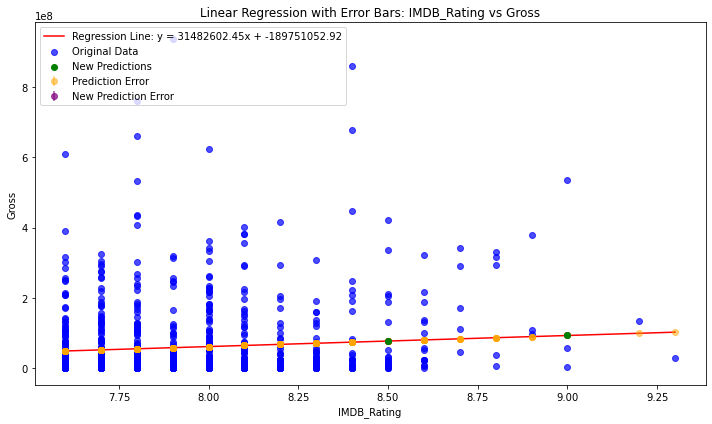

Intercept: -189751052.9237109, Slope: 31482602.448984325, R-squared: 0.007313354524413729, P-values: [0.04017094 0.00681201], Standard Error: 3193808.6163778766, Confidence Intervals: [[-3.70975804e+08 -8.52630200e+06]
 [ 8.69869338e+06  5.42665115e+07]]


In [23]:
def perform_linear_regression_and_plot(df, x_column, y_column, new_data=None):
    """
    Perform linear regression on the dataset, plot the regression line with confidence intervals 
    and error bars, and return the regression results as separate values.
    
    Parameters:
    df : Dataset containing the columns for regression.
    x_column (str): Column name for the independent variable (x-axis).
    y_column (str): Column name for the dependent variable (y-axis).
    new_data (array-like, optional): New data points for prediction with shape (n_samples, 1).
    
    Returns:
    tuple: Coefficients, R-squared, p-values, standard error, and confidence intervals.
    """
    # Prepare data
    X = df[x_column].values
    y = df[y_column].values
    X = sm.add_constant(X)  # Add constant for intercept term

    # Fit the regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Get predictions and residuals
    predictions = results.predict(X)
    residuals = y - predictions

    # Calculate standard error of predictions
    mse = np.mean(residuals**2)  # Mean squared error
    se = np.sqrt(mse / len(X))  # Standard error of the estimate
    
    # Calculate error bars for the predictions
    prediction_error = np.full_like(predictions, se)  # Constant error for each prediction

    # Generate plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of the original data
    plt.scatter(df[x_column], df[y_column], color='blue', alpha=0.7, label='Original Data')
    
    # Plot the regression line
    plt.plot(df[x_column], predictions, color='red', label=f'Regression Line: y = {results.params[1]:.2f}x + {results.params[0]:.2f}')
    
    # Add error bars (confidence interval or residuals-based)
    plt.errorbar(df[x_column], predictions, yerr=prediction_error, fmt='o', color='orange', alpha=0.5, label='Prediction Error')

    # If new data is provided, predict and plot with error bars
    if new_data is not None:
        new_data = np.array(new_data).reshape(-1, 1)
        new_data_with_const = sm.add_constant(new_data)  # Add constant for intercept term
        new_predictions = results.predict(new_data_with_const)
        new_errors = np.full_like(new_predictions, se)
        
        # Plot new predictions with error bars
        plt.scatter(new_data, new_predictions, color='green', label='New Predictions', zorder=5)
        plt.errorbar(new_data, new_predictions, yerr=new_errors, fmt='o', color='purple', alpha=0.7, label='New Prediction Error')

    # Add labels and legend
    plt.title(f'Linear Regression with Error Bars: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend(loc='upper left')
    plt.tight_layout()

    # Show plot
    plt.show()

    # Return values separately
    coef_intercept = results.params[0]
    coef_slope = results.params[1]
    r_squared = results.rsquared
    p_values = results.pvalues
    conf_int = results.conf_int()

    return coef_intercept, coef_slope, r_squared, p_values, se, conf_int

coef_intercept, coef_slope, r_squared, p_values, se, conf_int = perform_linear_regression_and_plot(movies_df, 'IMDB_Rating', 'Gross', new_data=[8.5, 9.0])
print(f"Intercept: {coef_intercept}, Slope: {coef_slope}, R-squared: {r_squared}, P-values: {p_values}, Standard Error: {se}, Confidence Intervals: {conf_int}")
